In [1]:
import pandas as pd

df = pd.read_csv('DataSets/milk_price_market_survey.csv')
df.head

<bound method NDFrame.head of       gram  price
0   1350.0  180.0
1   1400.0  176.0
2   1250.0  140.0
3    750.0   93.0
4    900.0  135.0
..     ...    ...
95   300.0   60.0
96  1300.0  147.0
97  1200.0  186.0
98   650.0   82.0
99  1000.0  131.0

[100 rows x 2 columns]>

Ectract the features and target varaibles

In [2]:
X = df[['gram']]
y = df[['price']]

Split the dataset into training and test set: 80/20

In [3]:
#sklearn -- sci-kit learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Model Training

In [4]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression() #multivariant liniar regression
mlr.fit(X_train, y_train) #model training

p_1 = mlr.coef_[0]
p_0 = mlr.intercept_
print("p(g) = %.2fg + %.2f"%(p_1, p_0))

p(g) = 0.11g + 21.71


Visulising the regrasssion line

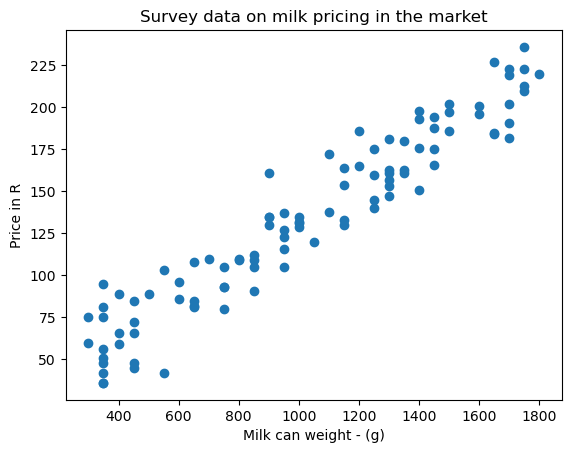

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['gram'], df['price'])
plt.xlabel('Milk can weight - (g)')
plt.ylabel('Price in R')
plt.title('Survey data on milk pricing in the market')
plt.show()

In [6]:
from sklearn.metrics import r2_score

y_pred_train = mlr.predict(X_train)
r2_score_train = r2_score(y_train,y_pred_train)

y_pred_test = mlr.predict(X_test)
r2_score_test = r2_score(y_test,y_pred_test)

print("r2_score-train: ",r2_score_train)
print("r2_score-test: ",r2_score_test)

r2_score-train:  0.9105743325791579
r2_score-test:  0.9191706611980854


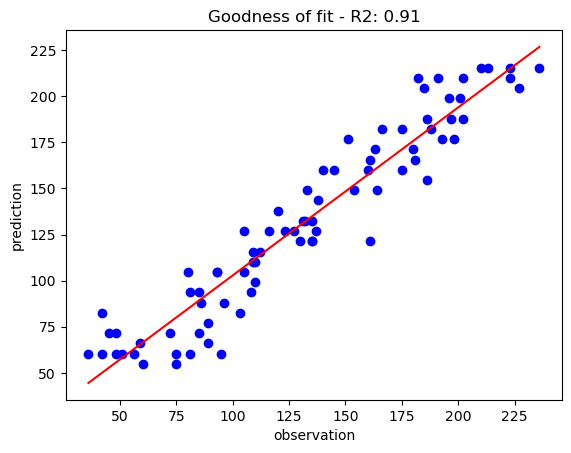

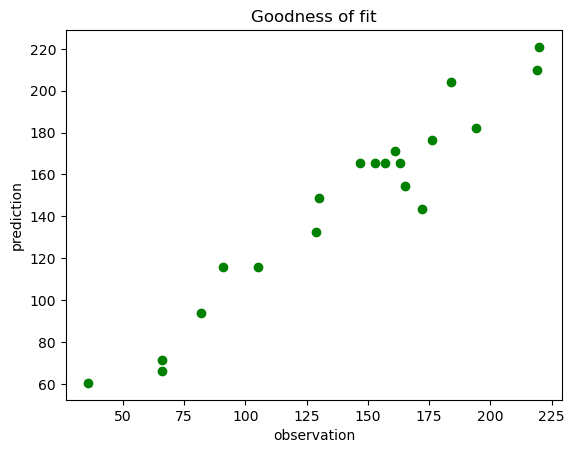

In [7]:
import matplotlib.pyplot as plt
import numpy as np
y_1 = y_train.iloc[:,0]
a, b = np.polyfit(y_1, y_pred_train,1)
yp_1 = [a*y_1.min()+b, a*y_1.max()+b]

plt.figure()
plt.scatter(y_train, y_pred_train, color="blue")
plt.plot([y_1.min(), y_1.max()],yp_1,color="red")
plt.xlabel('observation')
plt.ylabel('prediction')
plt.title('Goodness of fit - R2: %.2f'%(r2_score_train))
plt.show()

plt.figure()
plt.scatter(y_test, y_pred_test, color="green")
plt.xlabel('observation')
plt.ylabel('prediction')
plt.title('Goodness of fit')
plt.show()

How much will a milk can of 1.5kg cost?

In [11]:
import warnings
warnings.filterwarnings('ignore')

weight = 1500

feats = np.array([weight]).reshape(-1,1)
price = mlr.predict(feats)

print(f'A milk can of {feats[0][0]} will cost R{price[0][0]}')

A milk can of 1500 will cost R187.7029101912379
